 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

![Whale Hello There](../Images/whale_hello_there_clip.gif)

In [962]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [963]:
# Reading whale returns
whale_csv_path = Path("./Resources/whale_returns.csv")

In [964]:
whale_df = pd.read_csv(whale_csv_path)
whale_df = pd.read_csv(whale_csv_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(inplace=True)
whale_df.head(-1)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434


In [965]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [966]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [967]:
#check nulls dropped
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [968]:
# Reading algorithmic returns
algo_csv_path = Path("./Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_csv_path)
algo_df = pd.read_csv(algo_csv_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [969]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [970]:
# Drop nulls
algo_df.dropna(inplace=True)

print(algo_df.head())
print("")
print(algo_df.isnull().sum())

              Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761

Algo 1    0
Algo 2    0
dtype: int64


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [971]:
# Reading S&P 500 Closing Prices
sp_csv_path = Path("./Resources/sp500_history.csv")
sp_df = pd.read_csv(sp_csv_path)
sp_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [972]:
# Check Data Types
print(type(sp_df))
print(type(sp_df['Date']))
print(type(sp_df['Close']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [973]:
print(sp_df.dtypes)

Date     object
Close    object
dtype: object


In [974]:
# Fix Data Types
sp_df = pd.read_csv(sp_csv_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp_df.sort_index(inplace=True)

sp_df['Close'] = sp_df['Close'].str.replace("$","")

print(sp_df)

              Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93
...             ...
2019-04-16  2907.06
2019-04-17  2900.45
2019-04-18  2905.03
2019-04-22  2907.97
2019-04-23  2933.68

[1649 rows x 1 columns]


In [975]:
type(sp_df['Close'])

pandas.core.series.Series

In [976]:
sp_df['Close'] = sp_df['Close'].astype(float)
sp_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [977]:
print(sp_df.dtypes)

Close    float64
dtype: object


In [978]:
# Calculate Daily Returns
sp_daily_returns = sp_df.pct_change()
#note this keeps as a pandas df vs changing back to a series
sp_daily_returns

#also changing to percentage movements
sp_daily_percentage_change_returns = (sp_daily_returns*100).round(2).astype(str) + '%'
sp_daily_percentage_change_returns

,Close
Date,
2012-10-01,nan%
2012-10-02,0.09%
2012-10-03,0.36%
2012-10-04,0.72%
2012-10-05,-0.03%
...,...
2019-04-16,0.05%
2019-04-17,-0.23%
2019-04-18,0.16%


In [979]:
# Drop nulls
sp_daily_returns.dropna(inplace=True)

In [980]:
sp_daily_returns.isnull().sum()

Close    0
dtype: int64

In [981]:
# Rename `Close` Column to be specific to this portfolio.
sp_daily_returns.columns = ['SP500']
sp_daily_returns

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [982]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp_daily_returns], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [983]:
#check for null fields
combined_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
dtype: int64

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

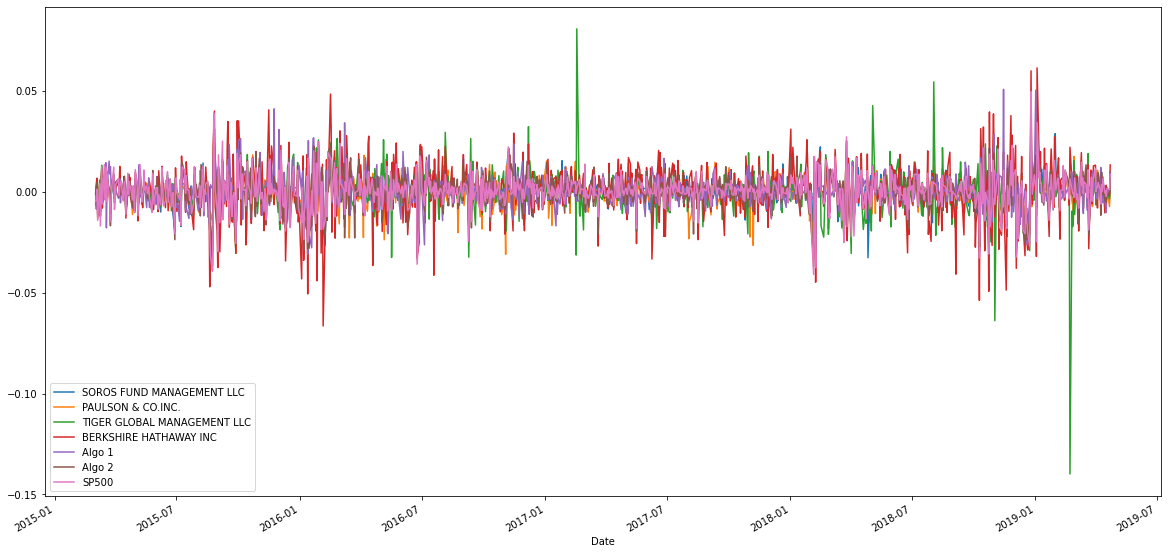

In [984]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

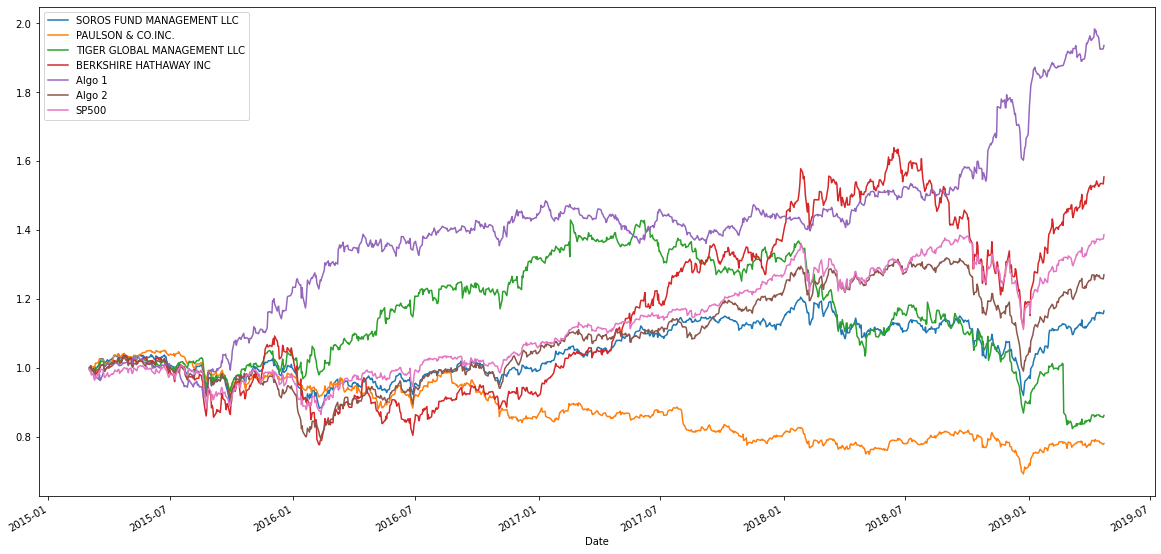

In [985]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()

# Plot cumulative returns, *from baseline index of 1 (or $1)
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

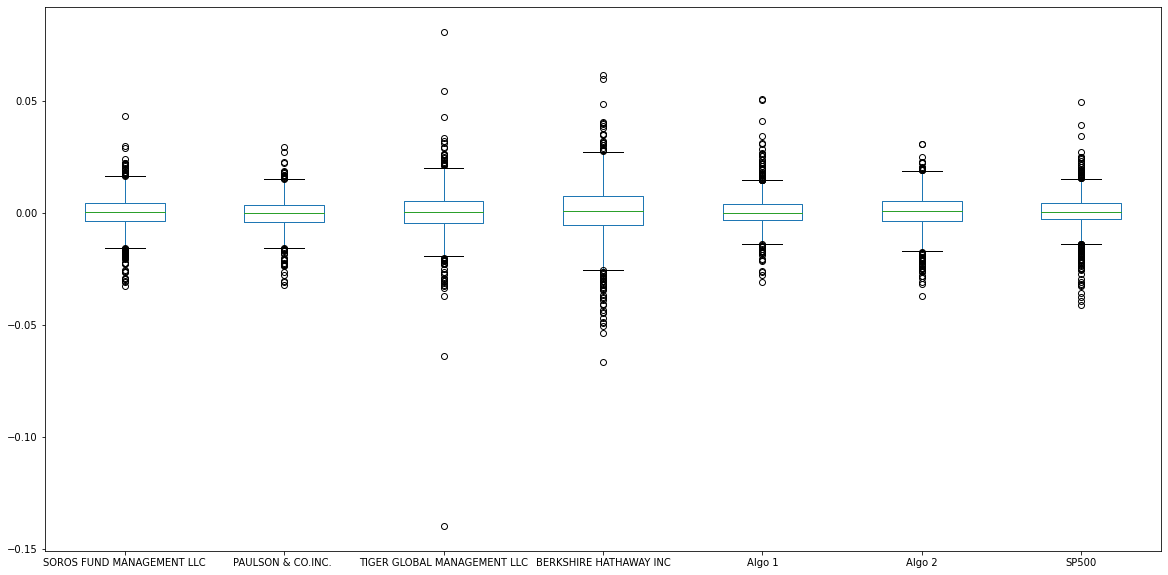

In [986]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [987]:
# Calculate the daily standard deviations of all portfolios
daily_volatility = combined_df.std()
daily_volatility.sort_values(inplace=True)
daily_volatility

#higher standard deviation, more volatility

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
SP500                          0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [988]:
# Calculate  the daily standard deviation of S&P 500
sp_volatility = daily_volatility['SP500']
print(f"S&P 500 daily volatility: {sp_volatility.round(6)}")
print("")

# Determine which portfolios are riskier than the S&P 500
print ("These portfolios are riskier than the S&P 500:")
for index, volatility in daily_volatility.items():
    if volatility > sp_volatility:
        print(f"{index}: {volatility:.5}")

S&P 500 daily volatility: 0.008554

These portfolios are riskier than the S&P 500:
TIGER GLOBAL MANAGEMENT LLC: 0.010894
BERKSHIRE HATHAWAY INC: 0.012919


### Calculate the Annualized Standard Deviation

In [989]:
# Calculate the annualized standard deviation (252 trading days)
annualized_volatility = combined_df.std() * np.sqrt(252)
annualized_volatility

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

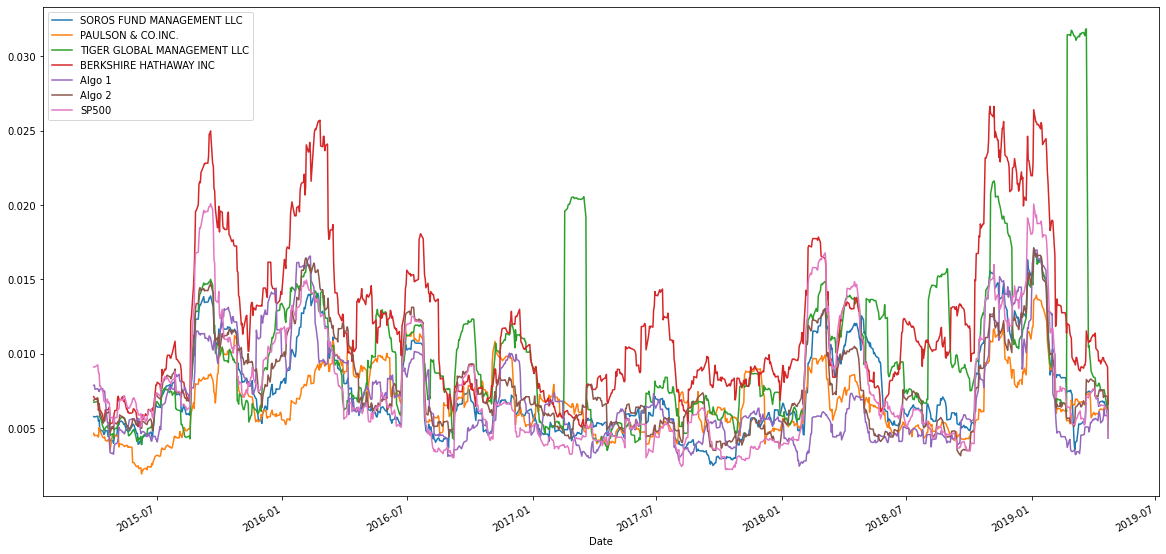

In [990]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21 = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [991]:
# Calculate the correlation
correlation = combined_df.corr()

# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

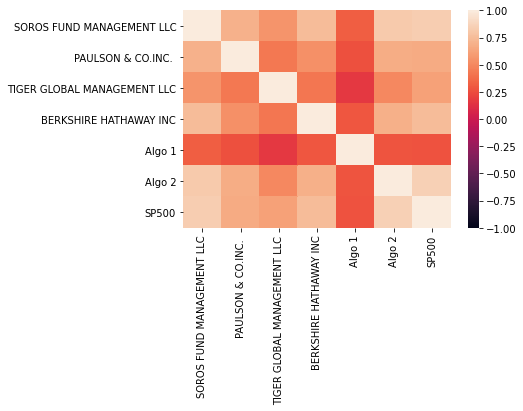

In [992]:
#also adding a heatmap
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

1.8217749991632826e-05
7.316632424648712e-05
0.24899091459425748


<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Algo1 Returns vs. SP 500 Daily Returns'}, xlabel='Date'>

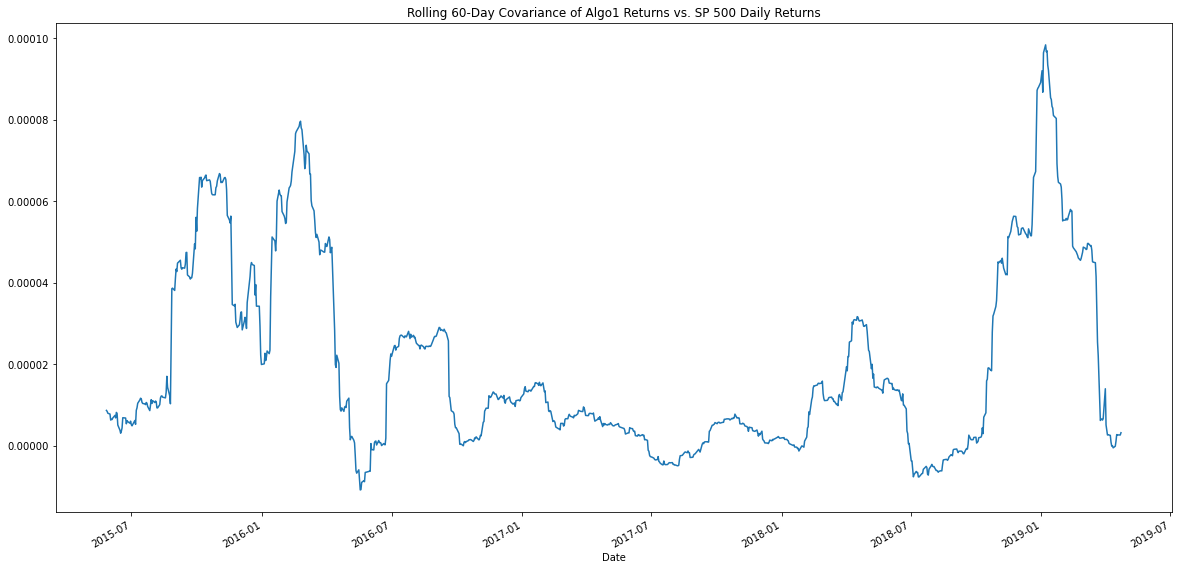

In [993]:
# Calculate covariance of a single portfolio
Algo1_Cov = combined_df['Algo 1'].cov(combined_df['SP500'])
print(Algo1_Cov)

# Calculate variance of S&P 500
sp500_variance = combined_df['SP500'].var()
print(sp500_variance)

# Computing beta
Algo1_beta = Algo1_Cov / sp500_variance
print(Algo1_beta)

# Plot beta trend
Algo1_rolling_covariance = combined_df['Algo 1'].rolling(window=60).cov(combined_df['SP500'])
Algo1_rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Algo1 Returns vs. SP 500 Daily Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'EWM 21-Day Covariance of Algo1 Returns vs. SP 500 Daily Returns'}, xlabel='Date'>

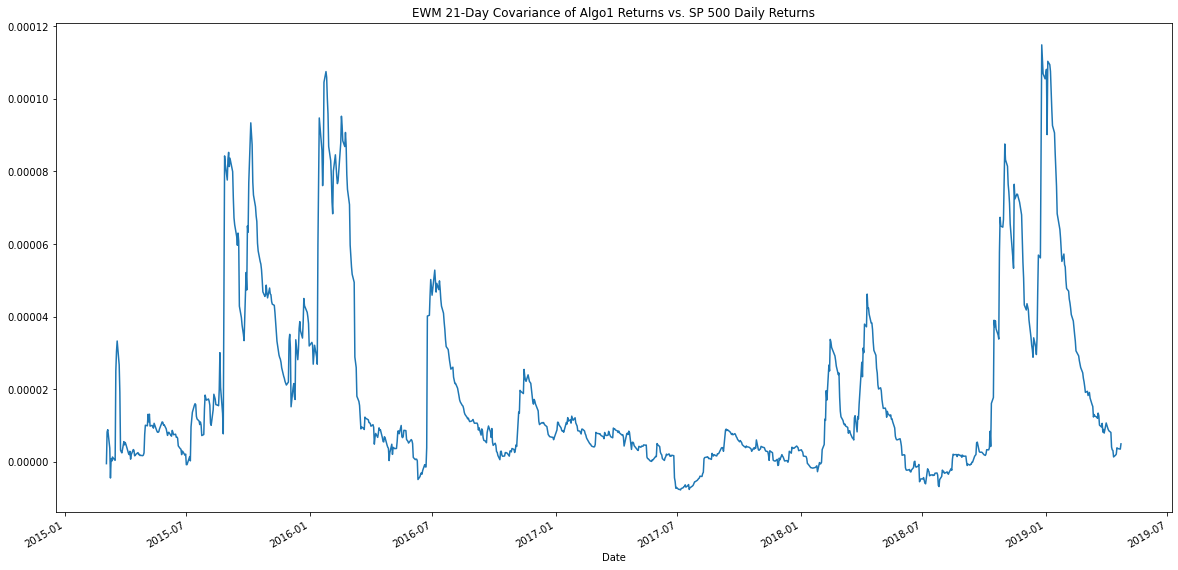

In [994]:
# Use `ewm` to calculate the rolling window
Algo1_ewm_covariance = combined_df['Algo 1'].ewm(21).cov(combined_df['SP500'])
Algo1_ewm_covariance.plot(figsize=(20, 10), title='EWM 21-Day Covariance of Algo1 Returns vs. SP 500 Daily Returns')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [995]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

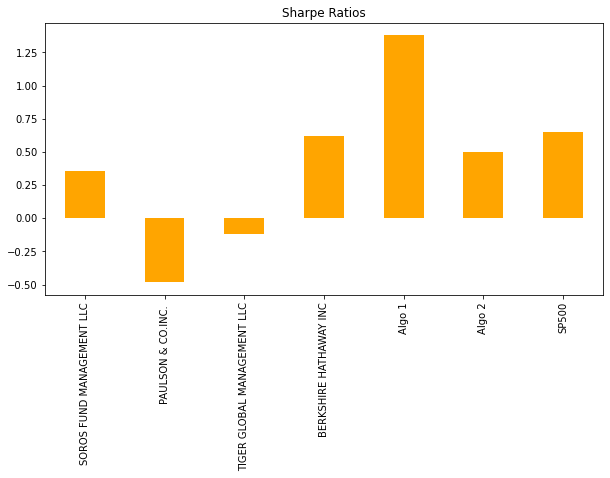

In [996]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(10,5), title = "Sharpe Ratios", color='orange')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Overall in this case would be best to go with the Algo 1 strategy;
- Algo 1 has outperformed the SP500 for daily returns over the last year and delivered the highest returns, with a high Sharpe ratio indicating relative risk is low
- Algo 2 has underperformed the SP500 slightly and also has a slightly low Sharpe ration indicating higher risk

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [997]:
# Reading data from 1st stock
goog_csv_path = Path("./Custom_Portfolio/GOOG_US.csv")
goog_df = pd.read_csv(goog_csv_path, header=0, infer_datetime_format=True, parse_dates=True)

#need this line to ensure dates are being read right and not in US format
goog_df['Date'] = pd.to_datetime(goog_df['Date'], dayfirst=True)

goog_df.set_index('Date', inplace=True)
goog_df.index = goog_df.index.date
goog_df.sort_index(inplace=True)

goog_df.tail(-1)

,Close
2018-01-03,1082.48
2018-01-04,1086.40
2018-01-05,1102.23
2018-01-08,1106.94
2018-01-09,1106.26
...,...
2019-04-23,1264.55
2019-04-24,1256.00
2019-04-25,1263.45
2019-04-26,1272.18


<AxesSubplot:>

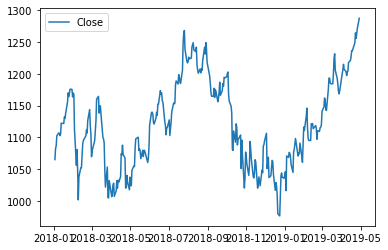

In [998]:
#checking datetime data pulling through ok
goog_df.plot()

In [999]:
type(goog_df)

pandas.core.frame.DataFrame

In [1000]:
# Reading data from 2nd stock
isrg_csv_path = Path("./Custom_Portfolio/ISRG_US.csv")
isrg_df = pd.read_csv(isrg_csv_path, header=0, infer_datetime_format=True, parse_dates=True)

#need this line to ensure dates are being read right and not in US format
isrg_df['Date'] = pd.to_datetime(isrg_df['Date'], dayfirst=True)

isrg_df.set_index('Date', inplace=True)
isrg_df.index = isrg_df.index.date
isrg_df.sort_index(inplace=True)

isrg_df.head(-1)

,Close
2018-01-02,375.25
2018-01-03,383.82
2018-01-04,376.92
2018-01-05,379.01
2018-01-08,391.86
...,...
2019-04-22,491.06
2019-04-23,500.42
2019-04-24,508.14
2019-04-25,517.78


<AxesSubplot:>

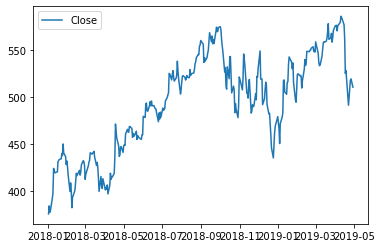

In [1001]:
isrg_df.plot()

In [1002]:
# Reading data from 3rd stock
mff_csv_path = Path("./Custom_Portfolio/MFF_AU.csv")
mff_df = pd.read_csv(mff_csv_path, header=0, infer_datetime_format=True, parse_dates=True)

#need this line to ensure dates are being read right and not in US format
mff_df['Date'] = pd.to_datetime(mff_df['Date'], dayfirst=True)

mff_df.set_index('Date', inplace=True)
mff_df.index = mff_df.index.date
mff_df.sort_index(inplace=True)

mff_df.head(-1)

,Close
2018-01-02,1.83
2018-01-03,1.83
2018-01-04,1.84
2018-01-05,1.88
2018-01-08,1.89
...,...
2019-04-18,2.43
2019-04-23,2.43
2019-04-24,2.44
2019-04-26,2.48


<AxesSubplot:>

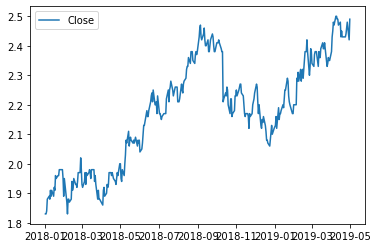

In [1003]:
mff_df.plot()

In [1004]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([goog_df, isrg_df, mff_df], axis="columns", join="inner")
custom_portfolio

,Close,Close,Close
2018-01-02,1065.00,375.25,1.83
2018-01-03,1082.48,383.82,1.83
2018-01-04,1086.40,376.92,1.84
2018-01-05,1102.23,379.01,1.88
2018-01-08,1106.94,391.86,1.89
...,...,...,...
2019-04-18,1236.37,528.06,2.43
2019-04-23,1264.55,500.42,2.43
2019-04-24,1256.00,508.14,2.44
2019-04-26,1272.18,519.11,2.48


In [1005]:
# Reset Date index
custom_portfolio.sort_index(inplace=True)
custom_portfolio

,Close,Close,Close
2018-01-02,1065.00,375.25,1.83
2018-01-03,1082.48,383.82,1.83
2018-01-04,1086.40,376.92,1.84
2018-01-05,1102.23,379.01,1.88
2018-01-08,1106.94,391.86,1.89
...,...,...,...
2019-04-18,1236.37,528.06,2.43
2019-04-23,1264.55,500.42,2.43
2019-04-24,1256.00,508.14,2.44
2019-04-26,1272.18,519.11,2.48


In [1006]:
# Reorganize portfolio data by having a column per symbol
custom_portfolio.columns = ['GOOG', 'ISRG', 'MFF']
custom_portfolio.head(5)

,GOOG,ISRG,MFF
2018-01-02,1065.00,375.25,1.83
2018-01-03,1082.48,383.82,1.83
2018-01-04,1086.40,376.92,1.84
2018-01-05,1102.23,379.01,1.88
2018-01-08,1106.94,391.86,1.89


In [1007]:
# Calculate daily returns
custom_portfolio_daily = custom_portfolio.pct_change()

# Drop NAs
custom_portfolio_daily.dropna(inplace=True)

# Display sample data
custom_portfolio_daily

,GOOG,ISRG,MFF
2018-01-03,0.016413,0.022838,0.000000
2018-01-04,0.003621,-0.017977,0.005464
2018-01-05,0.014571,0.005545,0.021739
2018-01-08,0.004273,0.033904,0.005319
2018-01-09,-0.000614,0.014648,-0.005291
...,...,...,...
2019-04-18,0.000024,0.005829,-0.008163
2019-04-23,0.022793,-0.052343,0.000000
2019-04-24,-0.006761,0.015427,0.004115
2019-04-26,0.012882,0.021589,0.016393


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [1008]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return, *using $10k initial investment as example
initial_investment = 10000
custom_portfolio_returns = custom_portfolio_daily.dot(weights)
custom_cumulative_returns = (1 + custom_portfolio_returns).cumprod()
cumulative_profit = initial_investment * custom_cumulative_returns

# Display sample data
cumulative_profit

2018-01-03    10130.837512
2018-01-04    10100.811796
2018-01-05    10241.735407
2018-01-08    10390.228358
2018-01-09    10420.508176
                  ...     
2019-04-18    13254.139211
2019-04-23    13123.585909
2019-04-24    13179.496624
2019-04-26    13402.951241
2019-04-29    13273.466924
Length: 323, dtype: float64

<AxesSubplot:>

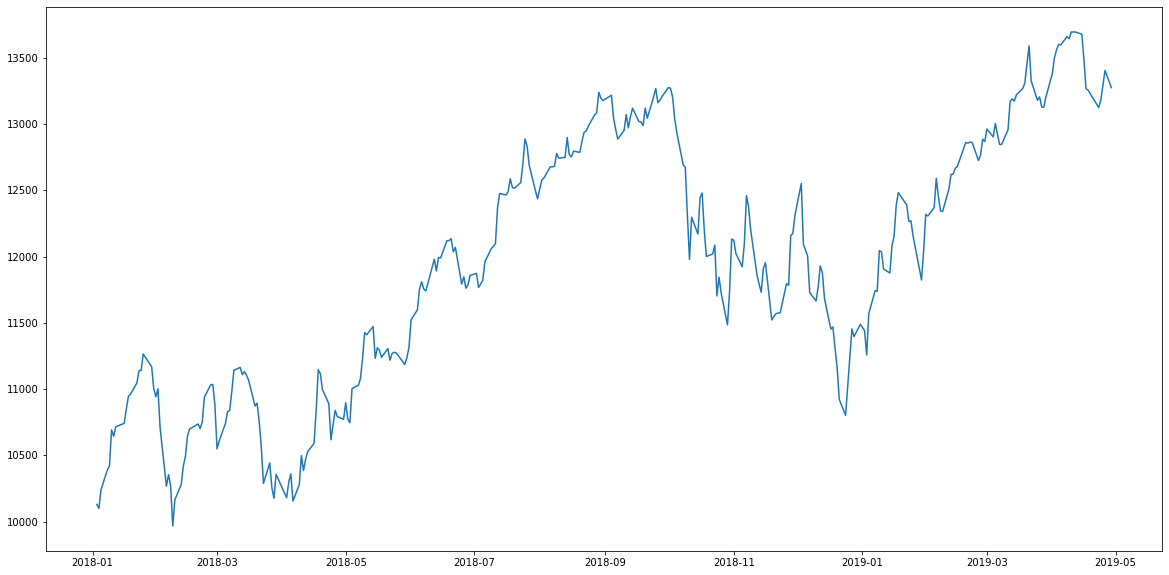

In [1009]:
#plot of cumulative returns
cumulative_profit.plot(figsize=(20,10))

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [1010]:
# Join your returns DataFrame to the original returns DataFrame
combined_df = pd.concat([combined_df, custom_portfolio_daily], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,GOOG,ISRG,MFF
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399,0.016413,0.022838,0.000000
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029,0.003621,-0.017977,0.005464
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034,0.014571,0.005545,0.021739
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662,0.004273,0.033904,0.005319
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303,-0.000614,0.014648,-0.005291
...,...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629,0.002652,-0.010363,0.004049
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.004938,-0.026664,-0.020161
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.007505,-0.064888,0.008230
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.000024,0.005829,-0.008163


In [1011]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df.dropna(inplace=True)
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,GOOG,ISRG,MFF
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399,0.016413,0.022838,0.000000
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029,0.003621,-0.017977,0.005464
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034,0.014571,0.005545,0.021739
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662,0.004273,0.033904,0.005319
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303,-0.000614,0.014648,-0.005291
...,...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629,0.002652,-0.010363,0.004049
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.004938,-0.026664,-0.020161
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.007505,-0.064888,0.008230
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.000024,0.005829,-0.008163


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [1012]:
# Calculate the annualized `std`
annualized_std = combined_df.std().mean()
annualized_std

0.012316075274698348

### Calculate and plot rolling `std` with 21-day window

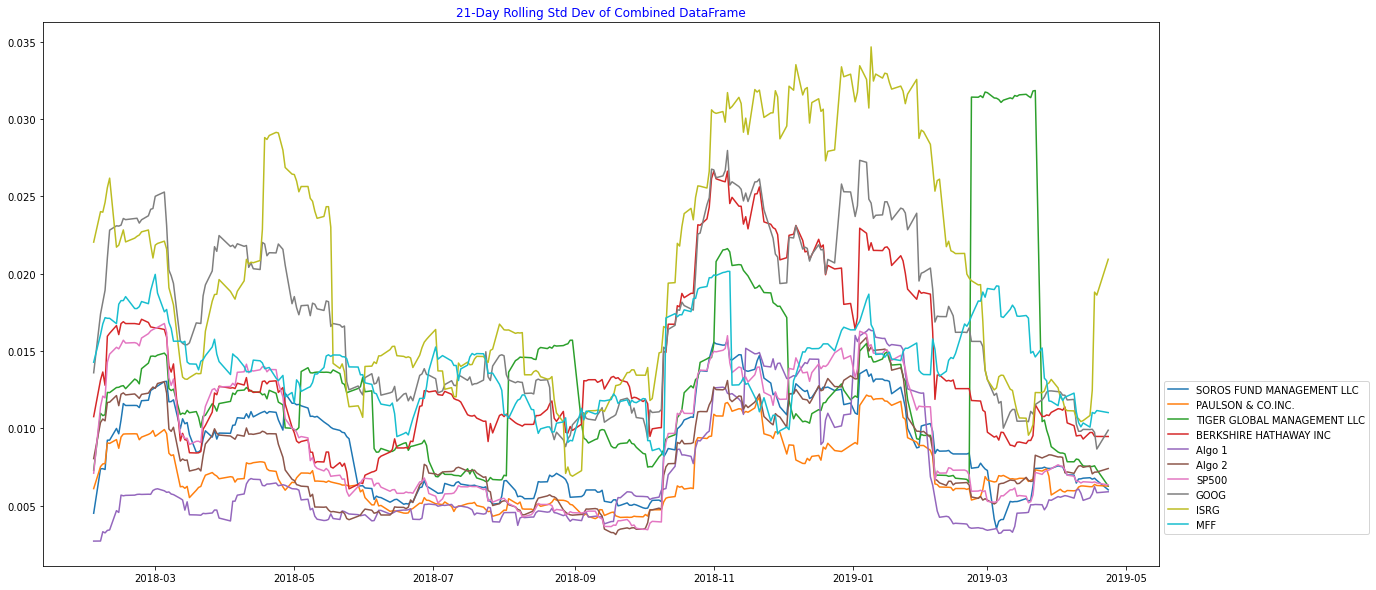

In [1013]:
# Calculate rolling standard deviation
rolling_std_21 = combined_df.rolling(window=21).std()

# Plot rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=(20,10))

#moved legend off the chart to tidy up
import matplotlib.pyplot as plt
plt.title('21-Day Rolling Std Dev of Combined DataFrame', color='Blue')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.2))
plt.show()

### Calculate and plot the correlation

In [1014]:
# Calculate and plot the correlation
correlation = combined_df.corr()

# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,GOOG,ISRG,MFF
SOROS FUND MANAGEMENT LLC,1.000000,0.760055,0.509410,0.783981,0.297391,0.832063,0.837468,0.655396,0.577964,0.130351
PAULSON & CO.INC.,0.760055,1.000000,0.520410,0.646676,0.310716,0.794619,0.776848,0.541879,0.471791,0.098213
TIGER GLOBAL MANAGEMENT LLC,0.509410,0.520410,1.000000,0.372939,0.119161,0.472301,0.553743,0.372329,0.303805,0.145804
BERKSHIRE HATHAWAY INC,0.783981,0.646676,0.372939,1.000000,0.291120,0.783894,0.834517,0.782212,0.682042,-0.013445
Algo 1,0.297391,0.310716,0.119161,0.291120,1.000000,0.314331,0.240881,0.218086,0.179860,-0.006762
Algo 2,0.832063,0.794619,0.472301,0.783894,0.314331,1.000000,0.882449,0.677364,0.600115,0.113516
SP500,0.837468,0.776848,0.553743,0.834517,0.240881,0.882449,1.000000,0.792028,0.679047,0.097595
GOOG,0.655396,0.541879,0.372329,0.782212,0.218086,0.677364,0.792028,1.000000,0.666529,0.006877
ISRG,0.577964,0.471791,0.303805,0.682042,0.179860,0.600115,0.679047,0.666529,1.000000,0.056652
MFF,0.130351,0.098213,0.145804,-0.013445,-0.006762,0.113516,0.097595,0.006877,0.056652,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Custom Portfolio Returns vs. SP 500 Daily Returns'}>

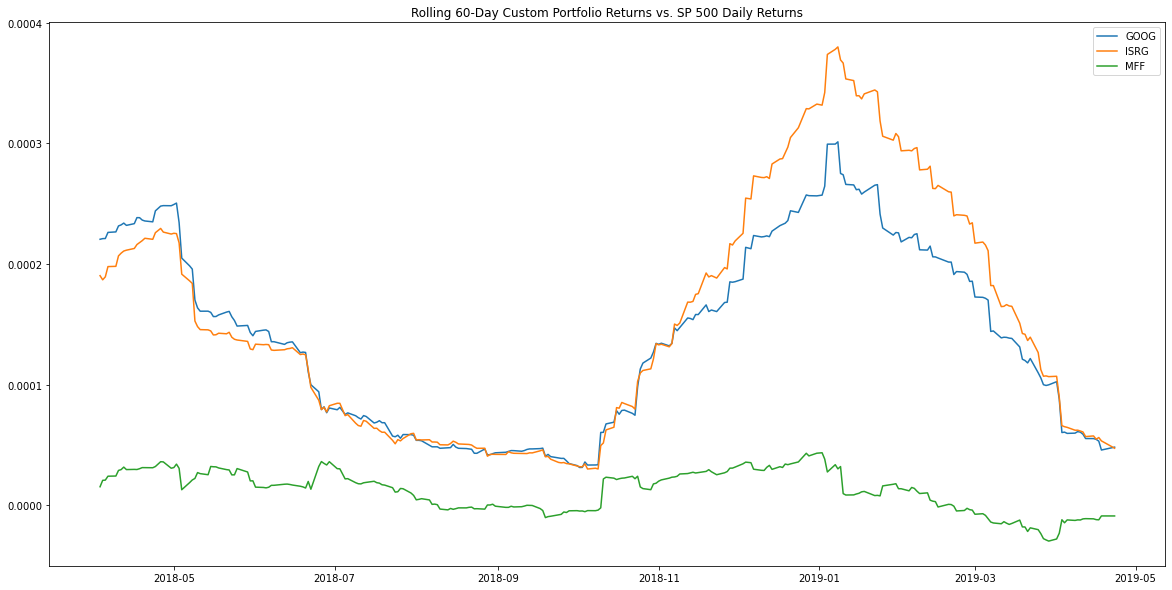

In [1015]:
# Calculate and plot Beta
GOOG_Cov = combined_df['GOOG'].cov(combined_df['SP500'])
ISRG_Cov = combined_df['ISRG'].cov(combined_df['SP500'])
MFF_Cov = combined_df['MFF'].cov(combined_df['SP500'])

GOOG_beta = GOOG_Cov / sp500_variance
ISRG_beta = ISRG_Cov / sp500_variance
ISRG_beta = ISRG_Cov / sp500_variance

GOOG_rolling_covariance = combined_df['GOOG'].rolling(window=60).cov(combined_df['SP500'])
ISRG_rolling_covariance = combined_df['ISRG'].rolling(window=60).cov(combined_df['SP500'])
MFF_rolling_covariance = combined_df['MFF'].rolling(window=60).cov(combined_df['SP500'])

GOOG_rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Custom Portfolio Returns vs. SP 500 Daily Returns', legend=True, label='GOOG')
ISRG_rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Custom Portfolio Returns vs. SP 500 Daily Returns', legend=True, label='ISRG')
MFF_rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Custom Portfolio Returns vs. SP 500 Daily Returns', legend=True, label='MFF')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [1016]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.001211
PAULSON & CO.INC.             -0.263477
TIGER GLOBAL MANAGEMENT LLC   -1.431572
BERKSHIRE HATHAWAY INC         0.291687
Algo 1                         2.019836
Algo 2                         0.166158
SP500                          0.335922
GOOG                           0.632884
ISRG                           0.840175
MFF                            1.117242
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

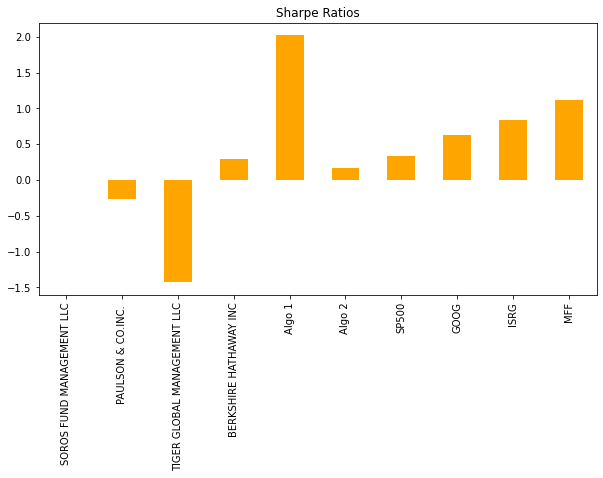

In [1017]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(10,5), title = "Sharpe Ratios", color='orange')

### How does your portfolio do?

The custom portfolio performs well relative to the S&P500 and the other stocks but not as good as the Algo 1 portfolio.
MFF Capital is the most stable of the custom portfolio with the lowest volatility and highest sharpe ratio.

In [1018]:
#And finally, exclusive picture below:

![Prince of Whales](../Images/prince_of_whales.png)